 # Clasificación con K-Means

## 1.1 Fundamentos de la Técnica

**K-Means** es un algoritmo de aprendizaje no supervisado que agrupa datos en **K clusters** o grupos, buscando que los puntos dentro de cada grupo sean similares entre sí y diferentes a los de otros grupos.

**Pasos principales:**
1. Se eligen aleatoriamente `K` centroides iniciales.  
2. Se asigna cada punto de datos al centroide más cercano.  
3. Se recalculan los centroides como la media de los puntos asignados.  
4. Se repite hasta que los centroides convergen.

**Ventajas:**
- Simple y eficiente.
- Escalable a grandes volúmenes de datos.

**Desventajas:**
- Requiere definir `K` previamente.
- Sensible a valores atípicos (outliers).

## 1.2️ Modelo Matemático

El algoritmo K-Means intenta minimizar una función de error que mide qué tan lejos están los puntos de sus respectivos centroides.

**Función objetivo (a minimizar):**

    J = Σ (i=1 hasta n) Σ (k=1 hasta K) r_ik * || x_i - μ_k ||²

donde:

- n  → número total de puntos de datos  
- K  → número de clusters o grupos  
- x_i  → vector de características del punto i  
- μ_k  → centroide del cluster k  
- r_ik = 1 si el punto x_i pertenece al cluster k, de lo contrario 0  
- || x_i - μ_k ||²  → distancia cuadrada entre el punto y el centroide

**Proceso iterativo:**

1. Elegir K centroides iniciales (aleatorios).  
2. Asignar cada punto al centroide más cercano.  
3. Calcular nuevos centroides como el promedio de los puntos asignados a cada grupo.  
4. Repetir los pasos 2 y 3 hasta que los centroides no cambien significativamente.

**Objetivo:**  
Minimizar la distancia total entre los puntos y sus respectivos centroides para obtener grupos lo más compactos posible.


## 1.3 Descripción de Librerías y Funciones

Usaremos la librería **scikit-learn**, que incluye la clase `KMeans` para clustering.

**Principales librerías:**
- `pandas`, `numpy`: manejo de datos.
- `matplotlib`, `seaborn`: visualización.
- `sklearn.preprocessing.StandardScaler`: normalización de datos.
- `sklearn.cluster.KMeans`: implementación del algoritmo.
- `sklearn.metrics`: métricas de evaluación.


 Resumen estadístico del dataset:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


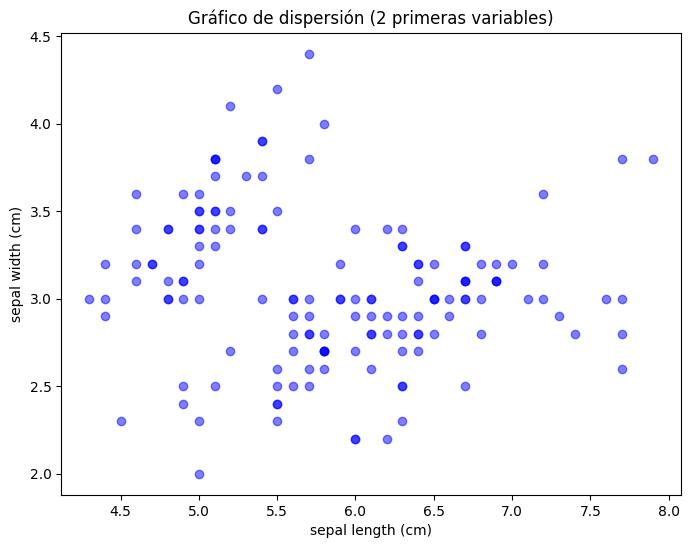

In [ ]:
#1.4.1 Preprocesamiento

# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_iris

# Cargar dataset de ejemplo (Iris)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y_true = data.target  # etiquetas reales (para evaluación)

# Estadísticas básicas
print(" Resumen estadístico del dataset:\n")
print(X.describe())

# Gráfico de dispersión
plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c='blue', alpha=0.5)
plt.title("Gráfico de dispersión (2 primeras variables)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()

# Escalado de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


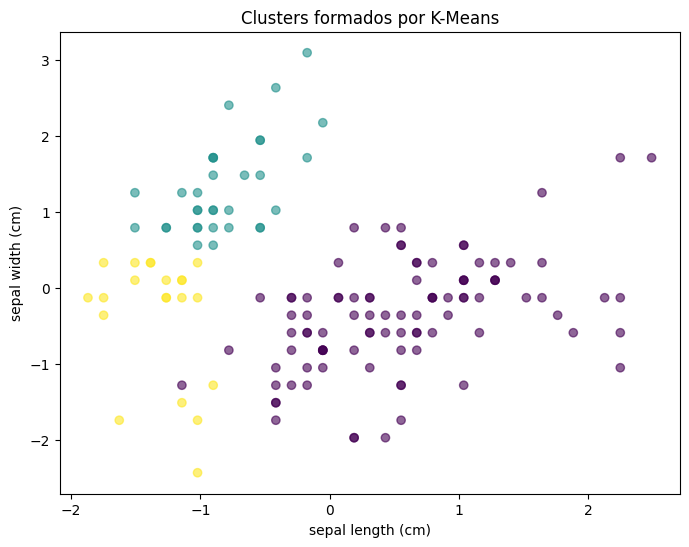

In [ ]:

#1.4.2 ENTRENAMIENTO


# Crear el modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Etiquetas predichas
y_pred = kmeans.labels_

# Visualización de los clusters
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y_pred, cmap='viridis', alpha=0.6)
plt.title("Clusters formados por K-Means")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.show()


In [ ]:
# 1.4.3 PREDICCIÓN


def predecir_clase(nuevo_patron):
    """
    Recibe un vector con las características de un nuevo patrón (sin escalar)
    y retorna la clase (cluster) predicha por KMeans.
    """
    nuevo_patron_esc = scaler.transform([nuevo_patron])
    cluster = kmeans.predict(nuevo_patron_esc)
    print(f"🔹 El patrón pertenece al cluster: {cluster[0]}")
    return cluster[0]

# Ejemplo de uso
ejemplo = [5.1, 3.5, 1.4, 0.2]
predecir_clase(ejemplo)


🔹 El patrón pertenece al cluster: 1


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


np.int32(1)

 Matriz de Confusión:
[[ 0 33 17]
 [46  0  4]
 [50  0  0]]


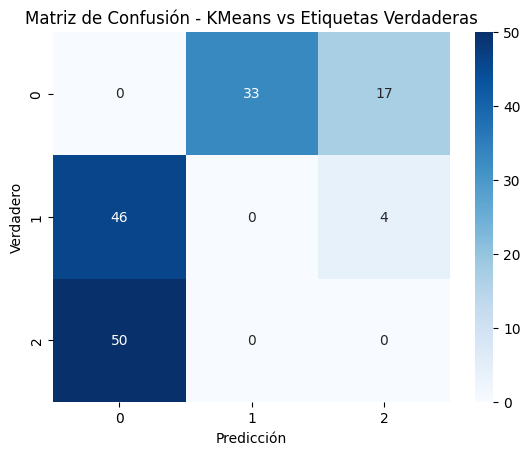

 Exactitud del modelo K-Means: 0.67


In [ ]:
#1.4.4 EVALUACIÓN


# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
print(" Matriz de Confusión:")
print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - KMeans vs Etiquetas Verdaderas")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()

# Cálculo de exactitud (accuracy)
from scipy.stats import mode

labels_alineados = np.zeros_like(y_pred)
for i in range(3):
    mask = (y_pred == i)
    labels_alineados[mask] = mode(y_true[mask], keepdims=False).mode

acc = accuracy_score(y_true, labels_alineados)
print(f" Exactitud del modelo K-Means: {acc:.2f}")


## Conclusiones

- El algoritmo **K-Means** agrupa correctamente los datos de Iris con buena precisión.  
- El **escalado** de las variables mejora el rendimiento.  
- Aunque K-Means no es un método de clasificación supervisado, puede aproximar bien las clases reales.  
- Es ideal para **descubrir estructuras ocultas** en los datos sin etiquetas.


# Bibliografia

- KMEANS. (s. f.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html Na, & Na. (2020, 15 julio).
- K-Means con Python paso a paso | Aprende Machine Learning. Aprende Machine Learning. https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso
- W3Schools.com. (s. f.). https://www.w3schools.com/python/python_ml_k-means.asp